# Pizza Resturant Analytics

We're going to answer the following questions:
1. The most popular Pizza Resturant Chains and types of Pizzas
2. The State's with the most Pizza Resturants and the Average Price per State.
3. Where are Pizza Resturants Located?

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [81]:
# read pizza data
pizza = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/8358_1.csv")
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,15.50,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,18.95,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,12.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [82]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   float64
 7   longitude           3510 non-null   float64
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2948 non-null   float64
 10  menus.amountMin     2948 non-null   float64
 11  menus.currency      2951 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

In [84]:
# extract interested columns
pizza_sub = pizza.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()
pizza_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   city             3510 non-null   object 
 2   address          3510 non-null   object 
 3   postalCode       3484 non-null   object 
 4   menus.name       3510 non-null   object 
 5   latitude         3510 non-null   float64
 6   longitude        3510 non-null   float64
 7   menus.amountMax  2948 non-null   float64
 8   menus.amountMin  2948 non-null   float64
dtypes: float64(4), object(5)
memory usage: 246.9+ KB


,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


### Most popular Resturant

In [85]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,15.50,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,18.95,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,12.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [86]:
pizza_name_df_count= pizza.groupby(['name']).size().to_frame('count').reset_index()
pizza_name_df_count.sort_values(by='count', ascending=False)[:10]

,name,count
732,Sicilia's Pizzeria,96
371,J & G Restaurant,55
162,Casey's General Store,43
832,The Pizza Joint,36
569,North End Pizzeria,34
428,Labella Pizza and Pasta,31
318,Giovanni's Pizzeria,30
562,Nino's Trattoria & Pizzeria,28
603,Papa John's Pizza,27
774,Takka Grill,26


### Most Popular Pizza Name

In [87]:
pizza_sub.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [88]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])
pizza_sub.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [89]:
# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()
names_of_pizza

Cheese Pizza                             130
White Pizza                               74
Pizza                                     62
Margherita Pizza                          60
Hawaiian Pizza                            53
                                        ... 
Apple Delight or Cherry Jubilee Pizza      1
Italian Sausage Pizza                      1
2 Medium Cheese Pizzas                     1
Pizza Dolce Alla Nutella                   1
Pizza Slice, Fries                         1
Name: menus.name, Length: 1598, dtype: int64

In [90]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')

pizza_sub.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1


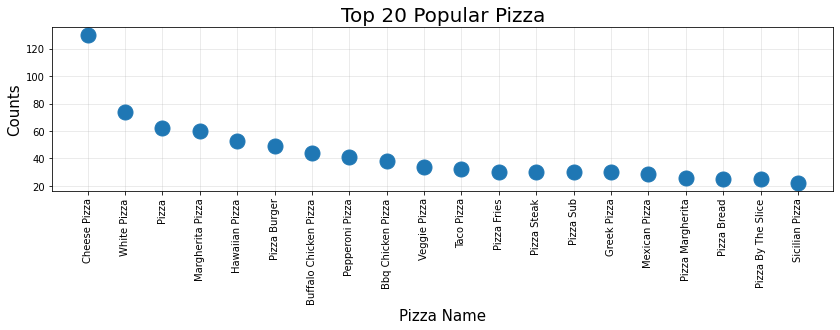

In [91]:
plt.figure(figsize=(14,3))
plt.plot(names_of_pizza.head(20), linestyle='none', markersize=15, marker='o')
plt.title('Top 20 Popular Pizza', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Pizza Name', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

# 2. Get the State information for each pizza restaurant

In [92]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,15.50,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,18.95,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,12.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [93]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/14zpallagi.csv.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

In [94]:
# read zipcode data
zipcode = pd.read_csv('14zpallagi.csv', usecols=['STATE', 'zipcode'], dtype={'zipcode': 'str'})
zipcode.head()

,STATE,zipcode
0,AL,00000
1,AL,00000
2,AL,00000
3,AL,00000
4,AL,00000


In [95]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATE,zipcode
0,AL,00000
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [96]:
# merge `pizza data` and `zipcode data`
pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
pizza_merge.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE,zipcode
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049


### Count the number of pizza restaurants by State

In [97]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')
pizza_clean.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE_x,zipcode,STATE_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701,24.0
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701,24.0
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049,326.0
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049,326.0
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049,326.0


In [99]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# drop unused columns and missing values
pizza_clean = pizza_clean.drop(['id', 'postalCode', 'zipcode'], axis=1).dropna()

# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'pizza_counts', 'state', 'state_counts']

pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0


In [100]:
pizza_state = pd.DataFrame(pizza_clean['state'].value_counts().head(10))
pizza_state

,state
NY,315
CA,299
PA,230
IL,141
FL,122
OH,114
TX,112
MD,93
NC,73
MI,62


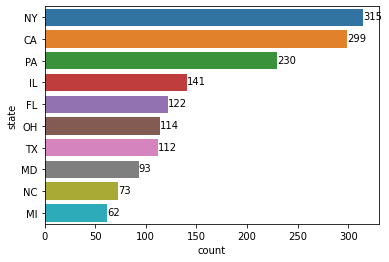

In [101]:
import matplotlib.pyplot as plt
import seaborn 

g = seaborn.countplot(y = 'state', data = pizza_clean ,
                  order=pizza_clean.state.value_counts().iloc[:10].index)

for index, value in enumerate(list(pizza_clean.state.value_counts().iloc[:10].values)):
    g.text(value , index + .1, str(value))

# 3. Average Pizza Price per State

In [103]:
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0


In [104]:
pizza_clean['average_price'] = (pizza_clean['menus_amountMax'] + pizza_clean['menus_amountMin']) / 2
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00


In [106]:
pizza_clean.groupby('state')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

,state,average_price
21,MS,15.785455
36,UT,15.673333
7,FL,15.212295
23,NC,14.725137
20,MO,14.673462
3,CA,14.483645
26,NV,14.337500
27,NY,14.227587
37,VA,14.159062
15,KY,13.255000


In [107]:
pizza_clean.groupby('city')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

,city,average_price
259,Marina Del Rey,97.450000
192,Hollywood,69.950000
459,Wellington,65.640000
183,Henrico,48.023333
387,Saint Louis,31.054000
401,Sayville,27.500000
188,Highwood,25.740000
373,Rockingham,24.233333
180,Hattiesburg,24.233333
218,Kinston,24.233333


### Let's make some Pizza Maps

In [75]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,geometry
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,15.50,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,POINT (-121.30080 44.10266)
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,18.95,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,POINT (-121.30080 44.10266)
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,12.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood,POINT (-118.46902 34.06456)
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood,POINT (-118.46902 34.06456)
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood,POINT (-118.46902 34.06456)


In [109]:
import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        lon = pizza['longitude'],
        lat = pizza['latitude'],
        text = pizza['name'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Pizza Resturant Locations in the US',
        geo_scope='usa',
    )
fig.show()

### Pizza Resturants in each State Map

In [78]:
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,dot_size,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0,5.542432,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0,5.042955,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0,3.922380,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0,4.098914,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0,4.098914,13.00


In [110]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=pizza_clean['state'],
    z=pizza_clean['state_counts'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=pizza_clean['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Resturants"
))

fig.update_layout(
    title_text='Pizza Resturants in each US State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()